In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
import matplotlib
print('Matplotlib version:', matplotlib.__version__)
import scipy
import sklearn
print('SciPy version :', scipy.__version__)
print('Scikit-learn version :', sklearn.__version__)

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2
Matplotlib version: 3.9.0
SciPy version : 1.11.4
Scikit-learn version : 1.2.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv('flight.csv')
df = pd.DataFrame(df)
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
32074,49876,9/8/2011,4/23/2012,Male,4,beijing,.,CN,31.0,3/31/2014,...,2350.0,14189,10/8/2013,176,59.222222,382,0,0.478229,3362,0
26104,47437,10/23/2005,10/23/2005,Male,4,NaN,NaN,SG,64.0,3/31/2014,...,1416.0,6846,10/12/2013,172,55.333333,195,0,1.319150,9070,1
20034,26395,8/18/2009,10/22/2009,Female,4,foshan,guangdong,CN,42.0,3/31/2014,...,1786.0,15918,1/7/2014,85,87.571429,207,1,0.766714,10571,1
50464,50337,1/5/2013,1/5/2013,Male,4,anshun,guizhou,CN,47.0,3/31/2014,...,0.0,2775,3/2/2013,396,28.000000,32,0,0.966667,2661,0
32420,5705,7/28/2011,7/28/2011,Male,4,shanghai,shanghaishi,CN,53.0,3/31/2014,...,0.0,11019,12/10/2013,113,102.200000,242,1,0.605608,12667,28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Separate numerical and  categorical features
numerical = ['MEMBER_NO', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 
             'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 
             'Points_Sum', 'Point_NotFlight']
categorical = ['FFP_DATE', 'FFP_TIER', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 
               'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

# Data Pre-Processing

## Handling Missing Values

In [10]:
# Calculate the number of missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data)

                   Missing Values  Percentage
MEMBER_NO                       0    0.000000
FFP_DATE                        0    0.000000
FIRST_FLIGHT_DATE               0    0.000000
GENDER                          3    0.004763
FFP_TIER                        0    0.000000
WORK_CITY                    2269    3.602273
WORK_PROVINCE                3248    5.156538
WORK_COUNTRY                   26    0.041278
AGE                           420    0.666794
LOAD_TIME                       0    0.000000
FLIGHT_COUNT                    0    0.000000
BP_SUM                          0    0.000000
SUM_YR_1                      551    0.874770
SUM_YR_2                      138    0.219089
SEG_KM_SUM                      0    0.000000
LAST_FLIGHT_DATE                0    0.000000
LAST_TO_END                     0    0.000000
AVG_INTERVAL                    0    0.000000
MAX_INTERVAL                    0    0.000000
EXCHANGE_COUNT                  0    0.000000
avg_discount                    0 

In [11]:
df_clean = df.copy() 

# Impute rows with mode & mean
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)
df_clean['WORK_COUNTRY'].fillna(df_clean['WORK_COUNTRY'].mode()[0], inplace=True)
df_clean['GENDER'].fillna(df_clean['GENDER'].mode()[0], inplace=True)

df_clean['AGE'].fillna(df_clean['AGE'].mean(), inplace=True)
df_clean['SUM_YR_1'].fillna(df_clean['SUM_YR_1'].mean(), inplace=True)
df_clean['SUM_YR_2'].fillna(df_clean['SUM_YR_2'].mean(), inplace=True)

# Check missing values
df_clean.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Feature Engineering

In [12]:
# Change date columns from object to datetime
df_clean['FFP_DATE'] = pd.to_datetime(df_clean['FFP_DATE'])
df_clean['LOAD_TIME'] = pd.to_datetime(df_clean['LOAD_TIME'])

In [13]:
# Extract loyalty / membership duration from FFP_DATE - LOAD_TIME (in months)
df_clean['LOYALTY'] = (df_clean['LOAD_TIME'].dt.year - df_clean['FFP_DATE'].dt.year) * 12 + (df_clean['LOAD_TIME'].dt.month - df_clean['FFP_DATE'].dt.month)

# Display the first few rows to check
print(df_clean[['FFP_DATE', 'LOAD_TIME', 'LOYALTY']].sample(5))

        FFP_DATE  LOAD_TIME  LOYALTY
45951 2012-08-24 2014-03-31       19
8536  2004-12-07 2014-03-31      111
9368  2006-06-02 2014-03-31       93
18463 2010-09-27 2014-03-31       42
11078 2008-04-24 2014-03-31       71


<Axes: >

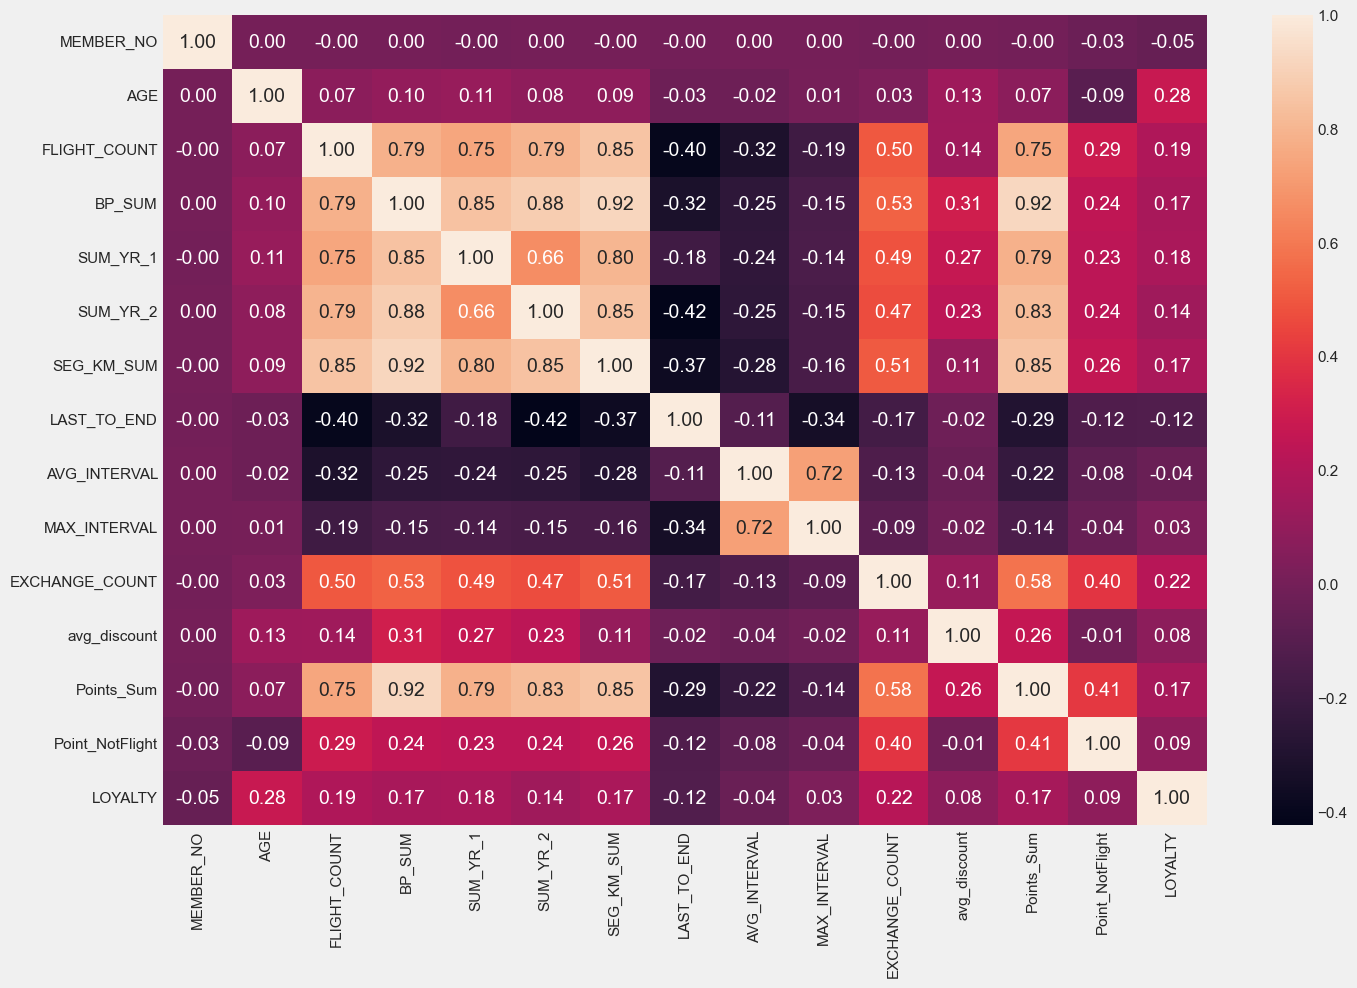

In [14]:
# Create heatmap to see corelation between numerical features after being cleaned

nums = ['MEMBER_NO', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 
        'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight', 'LOYALTY']
plt.figure(figsize=(15, 10))
sns.heatmap(df_clean[nums].corr(), annot=True, fmt='.2f')

## Feature Selection

Tujuan utama dalam mengklasifikasikan pelanggan berdasarkan karakteristik mereka dalam beberapa dimensi yang penting bagi bisnis untuk memahami dan mengelola interaksi dengan pelanggan. Dari landasan tersebut, berikut fitur yang dipilih untuk clustering:

Fitur "LOYALTY" merepresentasikan Lenght: Jangka waktu keanggotaan pelanggan dari pertama kali mendaftar hingga periode observasi (semakin lama pelanggan menjadi anggota berarti pelanggan "loyal" atau semakin baik).<br>

Fitur "AVG_INTERVAL" merepresentasikan interval: Jangka waktu antara penerbangan (semakin kecil berarti pelanggan baru saja melakukan penerbangan, oleh karena itu semakin kecil semakin baik).<br>

Fitur "FLIGHT_COUNT" merepresentasikan Frequency: Jumlah penerbangan pelanggan dalam periode observasi (semakin besar semakin baik yang berarti pelanggan sering melakukan penerbangan).<br>

Fitur "SEG_KM_SUM" merepresentasikan jarak tempuh: Jumlah jarak yang ditempuh selama periode observasi (semakin jauh jarak tempuhnya maka akan semakin besar biaya yang dibayarkan oleh customer). <br>



## Handling Outlier

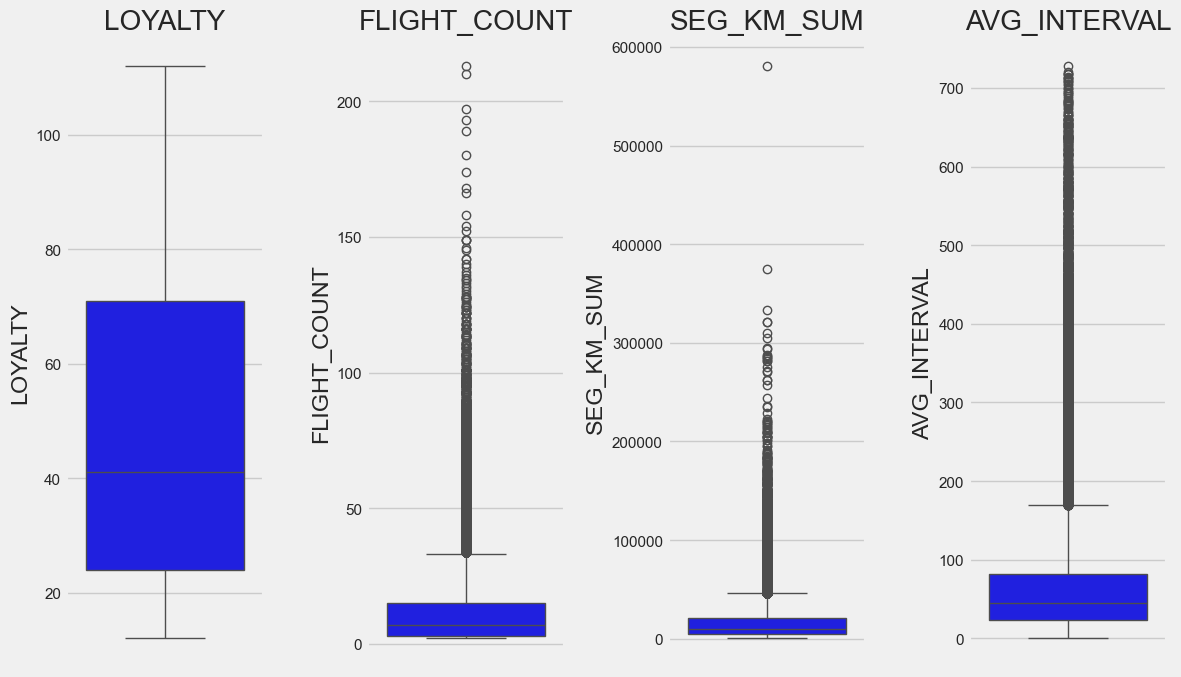

In [16]:
# Create boxplot to see outliers distribution before removing outliers
X_columns = ['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']

plt.figure(figsize=(15, 7))
for i in range(0, len(X_columns)):
    plt.subplot(1, 5, i+1)  # Adjusted to fit 16 plots
    sns.boxplot(y=df_clean[X_columns[i]], color='blue')
    plt.title(X_columns[i])
    plt.tight_layout()
plt.show()

insight: fitur 'FLIGHT_COUNT', 'SEG_KM_SUM', dan 'AVG_INTERVAL' terlihat memiliki outliers akan ditangani dengan metode IQR.

### IQR Method

In [17]:
iqr_columns = ['FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']
       
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the specified columns using the IQR method and update df_clean
df_clean = remove_outliers_iqr(df_clean, iqr_columns)

# Display the shape of the dataframe after removing outliers
print("Shape of dataframe after removing outliers:", df_clean.shape)

Shape of dataframe after removing outliers: (51441, 24)


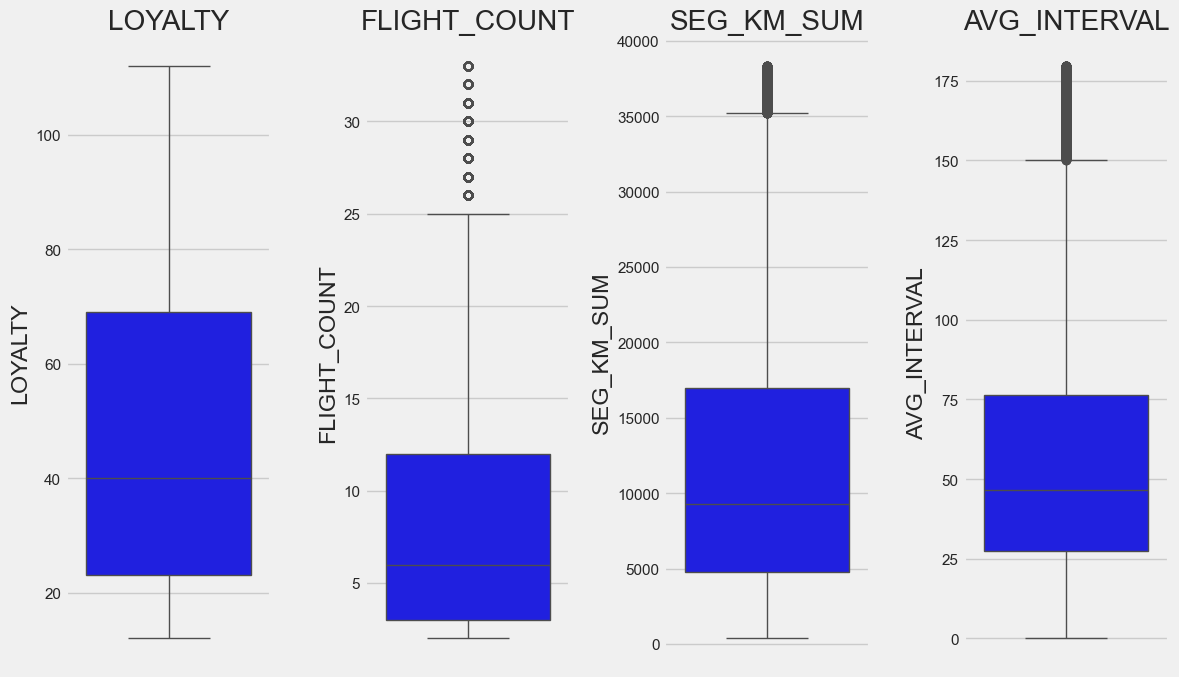

In [18]:
# Create boxplot to see outliers distribution before removing outliers
X_columns = ['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']

plt.figure(figsize=(15, 7))
for i in range(0, len(X_columns)):
    plt.subplot(1, 5, i+1)  # Adjusted to fit 16 plots
    sns.boxplot(y=df_clean[X_columns[i]], color='blue')
    plt.title(X_columns[i])
    plt.tight_layout()
plt.show()

## Standardization

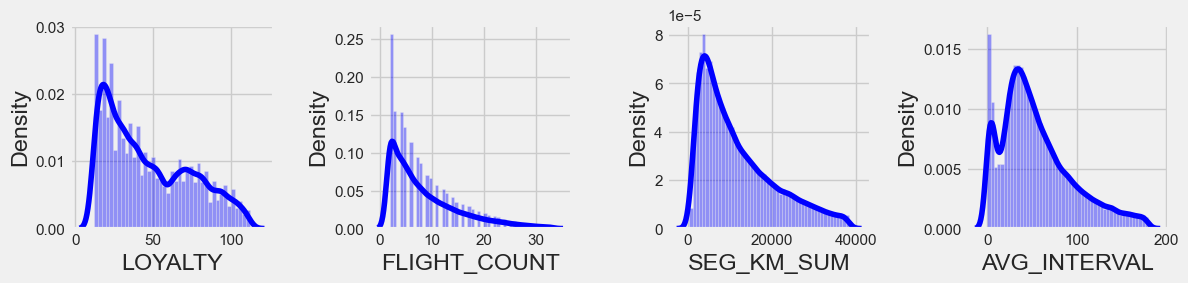

In [19]:
# Create distplot to see distribution
plt.figure(figsize=(15, 8))
for i in range(0, len(X_columns)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df_clean[X_columns[i]], color = 'blue')
    plt.tight_layout()
plt.show()

In [20]:
X_columns = ['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']

X = df_clean[X_columns].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd. DataFrame (data = X_std, columns = X_columns)
new_df.describe ()

,LOYALTY,FLIGHT_COUNT,SEG_KM_SUM,AVG_INTERVAL
count,5.144100e+04,5.144100e+04,5.144100e+04,5.144100e+04
mean,-6.188121e-17,-1.237624e-16,-3.536069e-17,1.502829e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.274819e+00,-9.920139e-01,-1.297766e+00,-1.388071e+00
25%,-8.738606e-01,-8.415316e-01,-7.983032e-01,-7.041978e-01
50%,-2.541974e-01,-3.900849e-01,-2.941063e-01,-2.251978e-01
75%,8.028751e-01,5.128086e-01,5.715838e-01,5.250433e-01
max,2.370259e+00,3.672936e+00,2.981652e+00,3.105039e+00
